# Multiple Linear Regression Using Gradient Descent And Stochastic Gradient Descent Algorithm

First, import the necessary modules (numpy, pandas, matplotlib)

In [2]:
# run this code cell using shift+enter before moving further
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, preprocessing

# Load the dataset

Define the column names in a list and use pandas read_csv to extract the dataframe from the file. Print the dataframe and the columns list to ensure that the mapping and the data was read correctly.

In [3]:
names =['Algebra2/Trigonometry', 
        'English', 'Geometry', 'Global History and Geography','Integrated Algebra', 
        'Living Environment', 'Physical Settings/Chemistry', 'Physical Settings/Physics',
        'Average SAT Score (Total)'
]

#Write your code below to save dataframe in the df variable below. 
# In place of None, write the pandas command to read the csv file.
#df = pd.read_csv('HS_Regents_Sat_Scores_2015.csv',names=names)
#print(df)
#print(df.columns.tolist())
#df = pd.read_csv('/Users/Farhad_Ahmed/Desktop/ML intros/ML Project/HS_Regents_Sat_Scores_2015.csv')
df = pd.read_csv('HS_Regents_Sat_Scores_2015.csv')
#print(df)
#data = df.values


Now, we must define which features of the dataframe we will use. Then extract these values from the dataframe and do some feature scaling if necessary. Fetch those columns of data into a smaller dataframe. Then filter out the rows that do not contain valid data.

In [4]:
#  Also, save the values in df2 after dropping empty rows from df1
# DEFINE Columns here -->
# extract all the columns that we need
df1=np.stack((df['Algebra2/Trigonometry'], df['English'], df['Geometry'],df['Global History and Geography'], df['Integrated Algebra'], df['Living Environment'], df['Physical Settings/Chemistry'], df['Physical Settings/Physics'], df['Average SAT Score (Total)'])).T

#remove any empty rows
df2=(df1[~np.isnan(df1).any(axis=1)])
print(df2)
print(df2.shape)

[[  52.6   71.9   66.4   61.    64.3   64.4   63.    64.7 1265. ]
 [  64.2   72.5   65.    66.9   63.5   70.8   65.7   71.5 1367. ]
 [  77.    74.    80.9   81.8   71.6   84.8   67.9   80.2 1700. ]
 [  81.2   88.2   84.2   90.9   88.2   90.7   83.1   79.9 1889. ]
 [  81.4   75.7   79.6   88.9   80.5   87.5   76.9   72.4 1704. ]
 [  64.    78.    72.1   72.6   72.6   73.2   73.1   74.1 1327. ]
 [  84.3   93.1   74.8   79.6   72.9   76.9   71.2   79.4 1511. ]
 [  92.9   91.5   93.1   94.3   93.7   93.6   88.7   91.5 2144. ]
 [  48.5   78.5   68.7   68.9   69.4   74.4   59.1   52.3 1358. ]
 [  51.3   74.6   64.3   60.2   68.3   64.3   54.2   50.4 1147. ]
 [  45.9   72.8   59.4   74.8   69.2   75.1   61.2   36.5 1292. ]
 [  67.8   83.2   75.5   81.    73.3   81.    66.2   63.2 1479. ]
 [  64.3   72.3   68.    65.    71.3   73.2   57.5   54.7 1116. ]
 [  81.9   78.2   82.5   85.1   84.7   83.    84.3   77.8 1529. ]
 [  56.    80.5   68.6   69.9   65.3   80.1   79.5   74.6 1257. ]
 [  54.9  

Create a vector and fill with the output values (SAT Score). Create a matrix and fill with the features extracted from the dataframe.

In [5]:
# df3 will be our feature matrix
df3 = df2[:,:8]
#print(df3)

# df4 will be the target vector
df4 = df2[:,8:]
#print(df4)
X2 = np.array(df3)
Y2= np.array(df4)

X = np.array(df3)
Y = np.array(df4)

# Check the shape of x and y vectors.
print(X.shape)
print(Y.shape)

(109, 8)
(109, 1)


Some reshaping here to convert the rank of the y vector. 

In [6]:
Y=Y.reshape(Y.shape[0],1) 
print(Y.shape)

(109, 1)


Calculating the value of n i.e. number of training examples. 

In [30]:
n=X.shape[0]
print(n)

109


## Appending a Column of ones in x

In [31]:
a=np.ones((Y.shape[0],1))
X=np.hstack((a , X))

In [32]:
# Shape of x should be [number of training examples (n)] x [number of features + 1]
# the 1 comes from the column of ones we just added
print(X.shape)

(109, 9)


## Cost Function

In [33]:
def compute_cost(x, y, w, n):
    #Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    cost=(1/(2*n)) * np.dot(np.ones(n).T, (np.dot(x,w)-y)**2)
    return cost

## Gradient Descent

In [34]:
def gradient_descent(x , y , learning_rate , w , n , num_iters):
    # write the updated value of w in temp 
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w_vector)- y ) 
        temp =  w - (learning_rate/n)*np.dot(x.T,(np.dot(x,w)-y))
        w = temp
        cost= compute_cost(x , y , w , n)      
            
    return w  

## Integrating the Batch Gradient Descent Function

Integrating the above function into a single function multiple_linear_reg_model_gda: This function uses gradient descent algorithm to minimize the cost.

In [35]:
def multiple_linear_reg_model_gda(x , y , n , learning_rate , num_iters):
    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(n,1)
    w = np.zeros((x.shape[1],1))

    #calculate the initial cost by calling the function you coded above.
    initial_cost= compute_cost(x, y , w, n)
    
    #calculate the optimized value of gradients by calling the gradient_descent function coded above
    w = gradient_descent(x , y , learning_rate , w , n , num_iters)
    
    #Calculate the cost with the optimized value of w by calling the cost function.
    
    final_cost = compute_cost(x, y , w, n)
    return w

Call this function to find the optimized values of parameters w. First, set the values of learning_rate and num_iters. You may have to call this function several number of times with different values of num_iters and learning_rate to find the optimal values of w. 

In [36]:

learning_rate = 0.0000029291
num_iters = 10000000

n = Y.shape[0]
w = multiple_linear_reg_model_gda(X , Y , n , learning_rate , num_iters)
print(w)




[[ 2.77187846]
 [ 1.67041848]
 [ 2.22635535]
 [ 7.77416561]
 [ 0.79173384]
 [ 2.30669379]
 [-0.74975861]
 [ 1.4527537 ]]


## Normal Equation Method

This can be used to cross-check the optimal values of w we just found using gradient descent above. These values should be same (or nearly same). First calculate q=inverse of (dot of (X.T,X)). Then w= dot of ( X.T , y) and then beta_vec= dot of (q,w). 

In [37]:

q = np.linalg.inv(np.dot(X2.T,X2))
w = np.dot(X2.T,Y2)
w_vec = np.dot(q,w)
print(w_vec)

[[ 3.01291137]
 [ 1.81567226]
 [ 2.41995147]
 [ 8.45018001]
 [ 0.86058026]
 [ 2.50727586]
 [-0.81495501]
 [ 1.5790801 ]]


The Values of w should be approximately same as the ones from multiple_linear_reg_model_gda. 

Create a predict function to plot results of learning algorithm and compare them with the plotted actual data.

In [38]:

def predict(x,w):
    yhat = np.dot(x,w)
    return yhat

yhat = predict(X2,w)
yhatNormalMethod = predict(X2,w_vec)

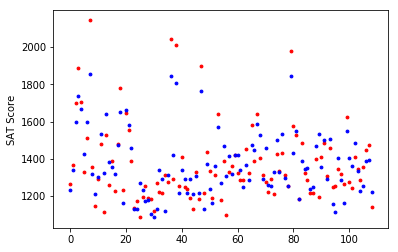

In [39]:

#plot predicted values and y to see simiarities
import matplotlib.pyplot as plt
X2 = np.arange(0,Y2.shape[0])
plt.scatter(X2,Y2,color ='red',s=8)
#plt.scatter(y,yhat,color ='blue',s=8)
plt.scatter(X2,yhatNormalMethod, color='blue',s=8)
plt.ylabel("SAT Score")
plt.xlabel("")
plt.title("")
plt.show()

## Calculate the R^2

In [40]:
def calculateR2(y,yhat):
    ym = np.mean(y)
    rss = np.sum((y-yhat)**2)
    ess = np.sum((yhat-ym)**2)
    tss = np.sum((y-ym)**2)
    return ess/tss #R^2

rsq1 = calculateR2(Y2,yhat)
rsq2 = calculateR2(Y2,yhatNormalMethod)
print(rsq1) 
print(rsq2) 

0.8671015895873929
0.6993012720703827


In [41]:
#Min and max values for predicted set
yhatmax = np.amax(yhat) 
yhatmin = np.amin(yhat) 
print(yhatmax,yhatmin)

1707.2436739828822 1002.8372987561428
